In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
df=pd.read_csv("C:\\Users\\Arjit's Hardwork\\Documents\\Python\\dipi\\PANDAS\\titanic test and train\\train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
#age is a float we can convert it into int
#age also has null values
#Cabin has null values and Embarked has null values
#5 integer values+2 float values+5 object values

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Lets check out the null values

In [14]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
#19 percent of the Age values are null it means they have to be imputed
#77 percent of the cabin values are null we will explore them and will see if any meaningful information can be drawn out

In [18]:
#lets separate the numerical variables and categorical variables

In [20]:
numerical=[var for var in df.columns if df[var].dtypes!='object']
categorical=[var for var in df.columns if df[var].dtypes=='object']

In [21]:
numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [22]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [24]:
#lets fill on the null values

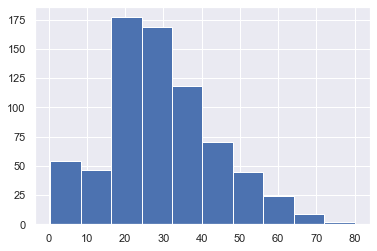

In [29]:
df["Age"].hist(); #mean imputation can be done as data doesnt look that much skewed

In [32]:
df["Cabin"].isnull().sum() # it is a mixed type of variable we can separate it into string and numerical

687

In [43]:
#Univariate analysis

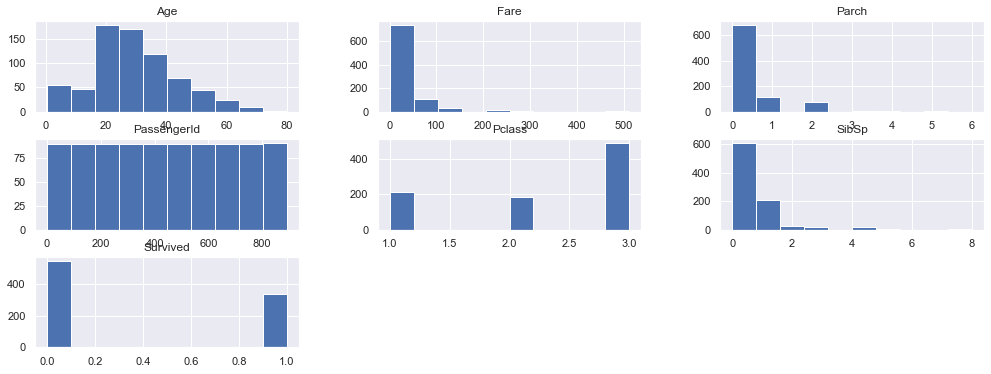

In [37]:
df[numerical].hist(figsize=(17,6));

In [39]:
#Fare,SibSp,Parch is skewed
#Pclass has only three values can be considered as a category
#Passenger Id is of no use as it is different for everyone

In [41]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [42]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [48]:
#Bivariate Analysis

In [53]:
table_SibSp=pd.crosstab(df["SibSp"],df["Survived"])
table_Parch=pd.crosstab(df["Parch"],df["Survived"])

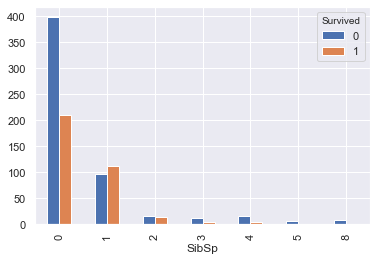

In [58]:
#Without Spouse and sibling were mostly non-survived
table_SibSp.plot(kind='bar');


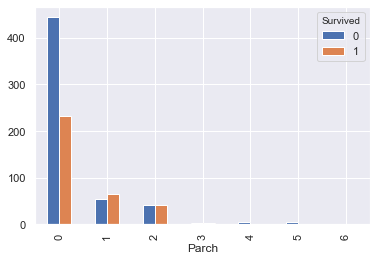

In [147]:
#Without Children people were mostly non-survived
table_Parch.plot(kind='bar');

In [61]:
df[["Fare"]].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [64]:
df["Age"]=df["Age"].fillna(np.mean(df["Age"]))

In [65]:
df["Age"]=df["Age"].astype("int")

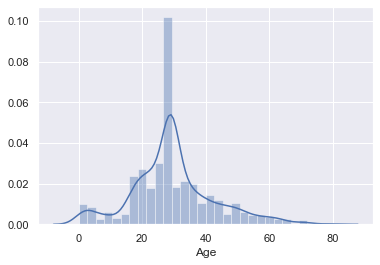

In [68]:
sns.distplot(df["Age"]);

In [73]:
df["Embarked"]=df["Embarked"].fillna("S")

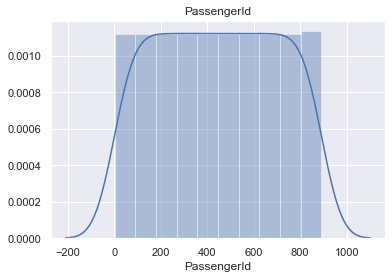

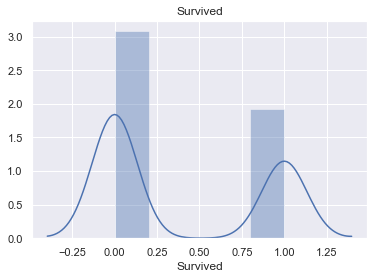

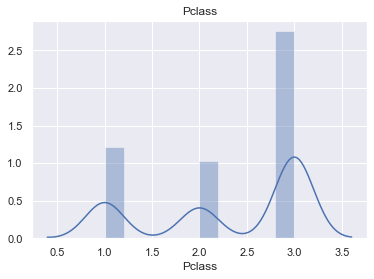

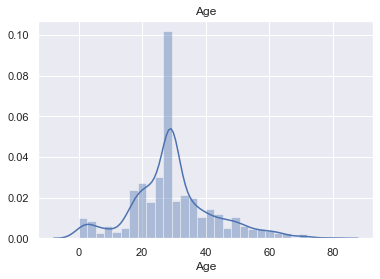

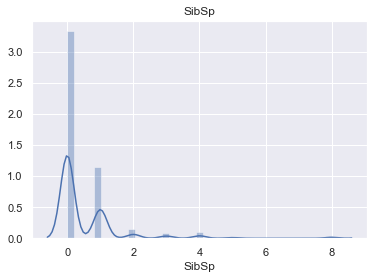

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

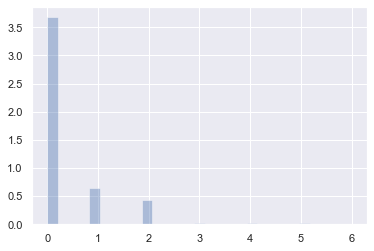

In [76]:

for i in numerical:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()
    print("\n")

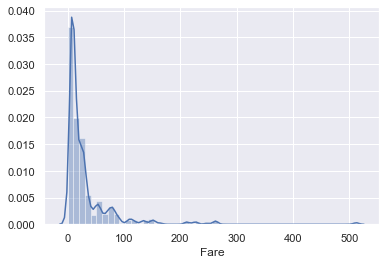

In [77]:
sns.distplot(df["Fare"])

In [114]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
# separation of the title from the name

In [86]:
df["Title"]=df["Name"].str.split().str.get(1)

In [89]:
df["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [94]:
tit=['Mr.', 'Mrs.', 'Miss.', 'Master.']

In [103]:
df["Title"]=df["Title"].map(lambda x: x if x in tit else "Rare")

In [104]:
tit={'Mr.':1, 'Mrs.':2, 'Miss.':3, 'Master.':4,'Rare':5}
df["Title"]=df["Title"].replace(tit)

In [121]:
df["Sex"]=df["Sex"].map(lambda x:"male" if x==1 else "female")

In [ ]:
#Embarked has highest S category

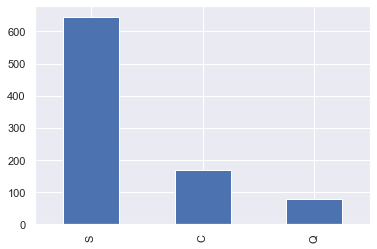

In [118]:
df["Embarked"].value_counts().plot(kind='bar');

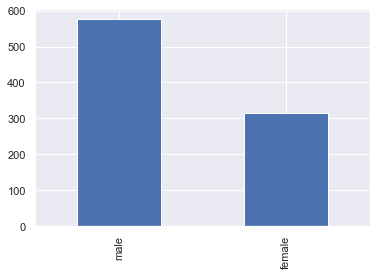

In [123]:
df["Sex"].value_counts().plot(kind='bar') #More no of males were there than females

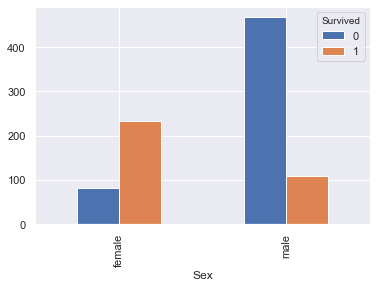

In [143]:
#Survival rate of Female are more than male
table_sex=pd.crosstab(df["Sex"],df["Survived"])
table_sex.plot(kind='bar')

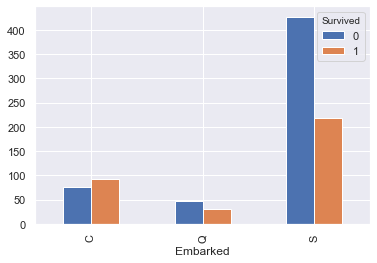

In [146]:
#The non survival rate is more in S embarkement
table_embarked=pd.crosstab(df["Embarked"],df["Survived"])
table_embarked.plot(kind='bar')

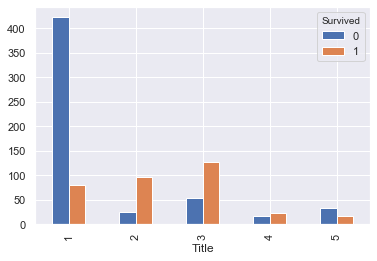

In [145]:
#tit={'Mr.':1, 'Mrs.':2, 'Miss.':3, 'Master.':4,'Rare':5}
#The Mr. title people had a low non survival rate and females with the Miss titles have survived more.Probably they were children and were boarded on small ships

table_title=pd.crosstab(df["Title"],df["Survived"])
table_title.plot(kind='bar')

In [151]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title',
       'Cabin_category'],
      dtype='object')

In [152]:
df.drop(["PassengerId","Cabin","Name","Ticket","Cabin_category"],axis=1,inplace=True)

In [299]:
dummy=pd.get_dummies(df) #creating dummy variables for the categorical data

In [254]:
X=dummies.drop("Survived",axis=1)
y=dummies["Survived"]

In [148]:
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [213]:
X_train.shape,X_test.shape

((712, 12), (179, 12))

In [257]:
gbm=GradientBoostingClassifier()

In [258]:
titanic_pipe=gbm.fit(X_train,y_train)

In [259]:
X_train_preds = titanic_pipe.predict_proba(X_train)[:,1]
X_test_preds = titanic_pipe.predict_proba(X_test)[:,1]

In [260]:
print('Train set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_train, X_train_preds)))

print('Test set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_test, X_test_preds)))

Train set
GBM roc-auc: 0.9480427255613824
Test set
GBM roc-auc: 0.8858429858429858


In [221]:
dt=pd.read_csv("C:\\Users\\Arjit's Hardwork\\Documents\\Python\\dipi\\PANDAS\\titanic test and train\\test.csv")

In [222]:
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [223]:
dt.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [226]:
dt[["Age"]].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


In [228]:
dt["Age"]=dt["Age"].fillna(np.mean(dt["Age"]))

In [229]:
dt["Age"]=dt["Age"].astype("int")

In [234]:
dt["Fare"]=dt["Fare"].fillna(np.mean(dt["Fare"]))

In [235]:
dt.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [236]:
dt["Title"]=dt["Name"].str.split().str.get(1)
tit=['Mr.', 'Mrs.', 'Miss.', 'Master.']
dt["Title"]=dt["Title"].map(lambda x: x if x in tit else "Rare")

In [237]:
tit={'Mr.':1, 'Mrs.':2, 'Miss.':3, 'Master.':4,'Rare':5}
dt["Title"]=dt["Title"].replace(tit)

In [238]:
dt.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [240]:
dt1=dt.copy()

In [242]:
dt.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [243]:
dt.shape

(418, 8)

In [245]:
dummies=pd.get_dummies(dt)

In [246]:
dummies.shape

(418, 11)

In [284]:
test_preds =titanic_pipe.predict(dummies)

In [285]:
test_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [300]:
test_preds.shape

(418,)

In [297]:
output = pd.DataFrame({'PassengerId': dt1.PassengerId, 'Survived':test_preds})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
